In [21]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

In [22]:
MaxX = 100;
MaxY = 100;
Step = 1000000;

In [23]:
def GetZ(X, Y):
    return 1 + math.cos(0.003 * (X - 50) * (Y - 50));

def GenerateSample():
    Sample = np.zeros((MaxX, MaxY));            
    for j in range(MaxY):
        for i in range(MaxX):
            newZ = int(GetZ(i, j) * 10);
            Sample[i][j] = newZ;
    return Sample;

In [24]:
def CreatePlane(Sample, Field):
    SampleSum = Sample.sum();
    FloatSample = Sample * (1 / SampleSum);
    SampleData = FloatSample;
    
    FieldSum = Field.sum();
    FloatField = Field * (1 / FieldSum);
    FieldData = FloatField;

    fig, axs = plt.subplots(1, 2, constrained_layout=True);
    axs[0].imshow(SampleData);
    axs[1].imshow(FieldData);

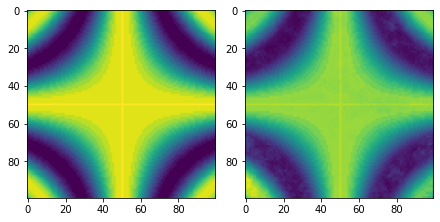

In [25]:
def main():
    Sample = GenerateSample();
    SampleSum = Sample.sum();

    CurrentPosition = np.array([random.randint(0, MaxX), random.randint(0, MaxY)]);
        
    Field = np.zeros((MaxX, MaxY));
    Field[CurrentPosition[0], CurrentPosition[1]] = 1;
    FieldSum = Field.sum();

    ShiftList = np.array(
            [[0, 1], [1, 1], [1, 0], [1, -1],
             [0, -1], [-1, -1], [-1, 0], [-1, 1]]);
    ShiftListIndex = [i for i in range(8)]; 

    for i in range(Step):
        random.shuffle(ShiftListIndex);
        CurrentH = float("inf");
        NewPosition = CurrentPosition;

        for RandomShift in ShiftListIndex:
            TempPosition = CurrentPosition + ShiftList[RandomShift];
            
            Expression = TempPosition[0] < 0 \
                or TempPosition[0] >= MaxX \
                or TempPosition[1] < 0 \
                or TempPosition[1] >= MaxY;
            if Expression:
                continue;
            
            Field[TempPosition[0], TempPosition[1]] += 1;
            TempTensor = Field * (1.0);
            TempTensor *= (-SampleSum * 1.0 / FieldSum);
            TempTensor += Sample;
            HeavisideTensor = np.heaviside(TempTensor, 0);
            TempTensor *= HeavisideTensor;
            H = TempTensor.sum();

            if H < CurrentH:
                CurrentH = H;
                NewPosition = TempPosition;
            
            Field[TempPosition[0], TempPosition[1]] -= 1;

        CurrentPosition = NewPosition;
        Field[CurrentPosition[0], CurrentPosition[1]] += 1;
        FieldSum += 1;

    CreatePlane(Sample, Field);

main();
